                                             ETL

Descargo el archivo para ver que contiene

In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv("AccidentesAviones.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5008 entries, 0 to 5007
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5008 non-null   int64 
 1   fecha                   5008 non-null   object
 2   HORA declarada          5008 non-null   object
 3   Ruta                    5008 non-null   object
 4   OperadOR                5008 non-null   object
 5   flight_no               5008 non-null   object
 6   route                   5007 non-null   object
 7   ac_type                 5008 non-null   object
 8   registration            5008 non-null   object
 9   cn_ln                   5008 non-null   object
 10  all_aboard              5008 non-null   object
 11  PASAJEROS A BORDO       5008 non-null   object
 12  crew_aboard             5008 non-null   object
 13  cantidad de fallecidos  5008 non-null   object
 14  passenger_fatalities    5008 non-null   object
 15  crew

Reviso una muestra:

In [4]:
df.head(3)

,Unnamed: 0,fecha,HORA declarada,Ruta,OperadOR,flight_no,route,ac_type,registration,cn_ln,all_aboard,PASAJEROS A BORDO,crew_aboard,cantidad de fallecidos,passenger_fatalities,crew_fatalities,ground,summary
0,0,"September 17, 1908",1718,"Fort Myer, Virginia",Military - U.S. Army,?,Demonstration,Wright Flyer III,?,1,2,1,1,1,1,0,0,"During a demonstration flight, a U.S. Army fly..."
1,1,"September 07, 1909",?,"Juvisy-sur-Orge, France",?,?,Air show,Wright Byplane,SC1,?,1,0,1,1,0,0,0,Eugene Lefebvre was the first pilot to ever be...
2,2,"July 12, 1912",0630,"Atlantic City, New Jersey",Military - U.S. Navy,?,Test flight,Dirigible,?,?,5,0,5,5,0,5,0,First U.S. dirigible Akron exploded just offsh...


Separo columna fecha en "Year" y "Month2, y elimino columnas que no son relevantes o no tienen información completa:

In [5]:
# Asegurarse de que la columna 'fecha' sea del tipo datetime
df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

# Crear las columnas 'año' y 'mes' a partir de la columna 'fecha'
df['year'] = df['fecha'].dt.year
df['month'] = df['fecha'].dt.month

# Eliminar las filas que no tienen datos completos en las columnas originales, 'fecha', 'HORA declarada', 'Ruta', 'OperadOR', etc.
columnas_originales = ['fecha', 'HORA declarada', 'Ruta', 'OperadOR', 'flight_no', 'route', 'ac_type', 'registration', 'cn_ln', 'all_aboard', 'PASAJEROS A BORDO', 'crew_aboard', 'cantidad de fallecidos', 'passenger_fatalities', 'crew_fatalities', 'ground', 'summary']
df.dropna(subset=columnas_originales, inplace=True)

In [7]:
# Lista de nombres de columnas que quieres eliminar
columnas_a_eliminar = ["Unnamed: 0","HORA declarada", "HORA declarada","flight_no","route","registration", "cn_ln", "ground"]

# Eliminar las columnas
df = df.drop(columnas_a_eliminar, axis=1)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("AccidentesAviones.csv", index=False)


In [10]:
# Lista de nombres de columnas que quieres eliminar
columnas_a_eliminar = ["fecha"]

# Eliminar las columnas
df = df.drop(columnas_a_eliminar, axis=1)

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("AccidentesAviones.csv", index=False)

In [11]:
# Elimina las columnas especificadas
columns_to_drop = ["PASAJEROS A BORDO", "crew_aboard", "crew_aboard", "crew_fatalities", "passenger_fatalities"]
df = df.drop(columns=columns_to_drop)

# Guarda el DataFrame resultante en un nuevo archivo CSV
df.to_csv("AccidentesAviones.csv", index=False)


Reviso dataset para ver como quedó:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5007 entries, 0 to 5007
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ruta                    5007 non-null   object
 1   OperadOR                5007 non-null   object
 2   ac_type                 5007 non-null   object
 3   all_aboard              5007 non-null   object
 4   cantidad de fallecidos  5007 non-null   object
 5   summary                 5007 non-null   object
 6   year                    5007 non-null   int32 
 7   month                   5007 non-null   int32 
dtypes: int32(2), object(6)
memory usage: 312.9+ KB


Reemplazo nombre de columnas para estandarizar un formato e idioma:

In [14]:
import pandas as pd

# Supongamos que df es tu DataFrame
# Define un diccionario con los cambios de nombres deseados
nombres_columnas = {
    "OperadOR": "Operador",
    "ac_type": "Ac_type",
    "all_aboard": "All_aboard",
    "cantidad de fallecidos": "Number_of_deaths",
    "summary": "Summary",
    "year": "Year",
    "month": "Month"
}

# Renombra las columnas utilizando el método rename de pandas
df.rename(columns=nombres_columnas, inplace=True)
df.to_csv("AccidentesAviones.csv", index=False)

Divido columna "Ruta" en dos columnas "City" y "Country" para profundizar análisis:

In [16]:
# Dividir la columna "Ruta" en dos columnas: "City" y "Country"
df[['City', 'Country']] = df['Ruta'].str.split(', ', expand=True, n=1)
df.to_csv("AccidentesAviones.csv", index=False)


Reemplazo los valores vacíos (NaN) en la columna "Country" con "Other":

In [44]:
# Reemplazar los valores vacíos (NaN) en la columna "Country" con "Other"
df['Country'].fillna('Other', inplace=True)
df.to_csv("AccidentesAviones.csv", index=False)


Elimino filas vacías:

In [67]:
# Eliminar las filas vacías
df = df.dropna()

df.to_csv("AccidentesAviones.csv", index=False)



Cambio los tipos de datos de las columnas para poder comenzar el análisis y guardo los cambios:

In [72]:
# Cambiar los tipos de datos de las columnas
df = df.astype({
    "Ruta": str,
    "Operador": str,
    "Ac_type": str,
    "All_aboard": int,
    "Number_of_deaths": int,
    "Summary": str,
    "Year": int,
    "Month": int,
    "City": str,
    "Country": str
})

# Guardar el DataFrame modificado en un nuevo archivo CSV
df.to_csv("AccidentesAviones.csv", index=False)


Realizo una muestra para ver como quedó:

In [73]:
df.head(5)

,Ruta,Operador,Ac_type,All_aboard,Number_of_deaths,Summary,Year,Month,City,Country
0,"Fort Myer, Virginia",Military - U.S. Army,Wright Flyer III,2,1,"During a demonstration flight, a U.S. Army fly...",1908,9,Fort Myer,Virginia
1,"Juvisy-sur-Orge, France",?,Wright Byplane,1,1,Eugene Lefebvre was the first pilot to ever be...,1909,9,Juvisy-sur-Orge,France
2,"Atlantic City, New Jersey",Military - U.S. Navy,Dirigible,5,5,First U.S. dirigible Akron exploded just offsh...,1912,7,Atlantic City,New Jersey
3,"Victoria, British Columbia, Canada",Private,Curtiss seaplane,1,1,The first fatal airplane accident in Canada oc...,1913,8,Victoria,"British Columbia, Canada"
4,Over the North Sea,Military - German Navy,Zeppelin L-1 (airship),20,14,The airship flew into a thunderstorm and encou...,1913,9,Over the North Sea,Other


                                              EDA

Una vez listos los datos, comienzo con el análisis de los mismos para revisar la información que me brinda el dataset.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Información general sobre el conjunto de datos:

In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 5006
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Ruta              4990 non-null   object
 1   Operador          4990 non-null   object
 2   Ac_type           4990 non-null   object
 3   All_aboard        4990 non-null   int32 
 4   Number_of_deaths  4990 non-null   int32 
 5   Summary           4990 non-null   object
 6   Year              4990 non-null   int32 
 7   Month             4990 non-null   int32 
 8   City              4990 non-null   object
 9   Country           4990 non-null   object
dtypes: int32(4), object(6)
memory usage: 350.9+ KB
None


Este DataFrame contiene información sobre accidentes de aviación con 4990 entradas y 10 columnas. 
El DataFrame consta de 10 columnas, que incluyen información sobre la ruta, operador, tipo de aeronave, número total de personas a bordo, número de fallecidos, resumen del incidente, año, mes, ciudad y país. Los tipos de datos predominantes son objetos (strings) para las columnas que contienen texto y enteros de 32 bits para las columnas numéricas.


Verificar si hay valores nulos:

In [127]:
print(df.isnull().sum())

Ruta                0
Operador            0
Ac_type             0
All_aboard          0
Number_of_deaths    0
Summary             0
Year                0
Month               0
City                0
Country             0
dtype: int64


No se encuentran valores nulos en ninguna de las columnas, lo que indica que el DataFrame está limpio en términos de datos faltantes.

Resumen estadístico del conjunto de datos:

In [89]:
print(df.describe())

        All_aboard  Number_of_deaths         Year        Month
count  4990.000000       4990.000000  4990.000000  4990.000000
mean     31.126854         22.323447  1970.922044     6.697395
std      45.482780         35.027561    24.692670     3.529819
min       0.000000          0.000000  1908.000000     1.000000
25%       7.000000          4.000000  1951.000000     4.000000
50%      16.000000         11.000000  1970.000000     7.000000
75%      35.000000         25.000000  1992.000000    10.000000
max     644.000000        583.000000  2021.000000    12.000000


Número de personas a bordo (All_aboard):
El recuento (count) muestra que se tienen datos para 4990 accidentes de aviación en el conjunto de datos.
La media (mean) del número de personas a bordo en estos accidentes es de aproximadamente 31.13.
La desviación estándar (std) es relativamente alta, con un valor de aproximadamente 45.48, lo que indica que hay una gran variabilidad en el número de personas a bordo en los accidentes.
El valor mínimo (min) es 0, lo que sugiere que hay accidentes en los que no había personas a bordo, posiblemente accidentes que involucran aeronaves no tripuladas.
Los valores del percentil 25% (25%) y el percentil 75% (75%) son 7 y 35, respectivamente. Esto indica que el 25% de los accidentes tienen 7 personas o menos a bordo, mientras que el 25% de los accidentes tienen 35 personas o más a bordo.
El valor máximo (max) es 644, lo que sugiere que hubo accidentes con un gran número de personas a bordo.

Número de fallecidos (Number_of_deaths):
El recuento (count) muestra que se tienen datos para 4990 accidentes de aviación en el conjunto de datos.
La media (mean) del número de fallecidos en estos accidentes es de aproximadamente 22.32.
La desviación estándar (std) es relativamente alta, con un valor de aproximadamente 35.03, lo que indica que hay una gran variabilidad en el número de fallecidos en los accidentes.
El valor mínimo (min) es 0, lo que sugiere que hay accidentes en los que no hubo fallecidos.
Los valores del percentil 25% (25%) y el percentil 75% (75%) son 4 y 25, respectivamente. Esto indica que el 25% de los accidentes tuvieron 4 fallecidos o menos, mientras que el 25% de los accidentes tuvieron 25 fallecidos o más.
El valor máximo (max) es 583, lo que sugiere que hubo accidentes con un alto número de fallecidos.

Año (Year):
El análisis de la columna "Year" muestra que los accidentes de aviación en el conjunto de datos abarcan desde el año 1908 hasta el año 2021.
La media (mean) del año es aproximadamente 1970.92, lo que sugiere que, en promedio, los accidentes ocurrieron alrededor de ese año.
La desviación estándar (std) es relativamente baja, con un valor de aproximadamente 24.69, lo que indica que los años de los accidentes tienden a estar cerca de la media.
El valor mínimo (min) es 1908, que es el año más temprano en el conjunto de datos.
El valor máximo (max) es 2021, que es el año más reciente en el conjunto de datos.

Mes (Month):
El análisis de la columna "Month" muestra que los accidentes de aviación en el conjunto de datos abarcan todos los meses del año, desde enero (1) hasta diciembre (12).
La media (mean) de los meses es aproximadamente 6.70, lo que sugiere que, en promedio, los accidentes ocurrieron alrededor del séptimo mes (julio).
La desviación estándar (std) es relativamente baja, con un valor de aproximadamente 3.53, lo que indica que los meses de los accidentes tienden a estar cerca de la media.
El valor mínimo (min) es 1 (enero) y el valor máximo (max) es 12 (diciembre), lo que indica que todos los meses están representados en el conjunto de datos.
En resumen, estas estadísticas proporcionan una visión general de la distribución de los datos en las columnas "All_aboard" (número de personas a bordo) y "Number_of_deaths" (número de fallecidos) en el conjunto de datos de accidentes de aviación. Estos datos son útiles para comprender la variabilidad en el número de personas a bordo y el número de fallecidos en accidentes a lo largo del tiempo.


   Análisis de la distribución de datos numéricos:

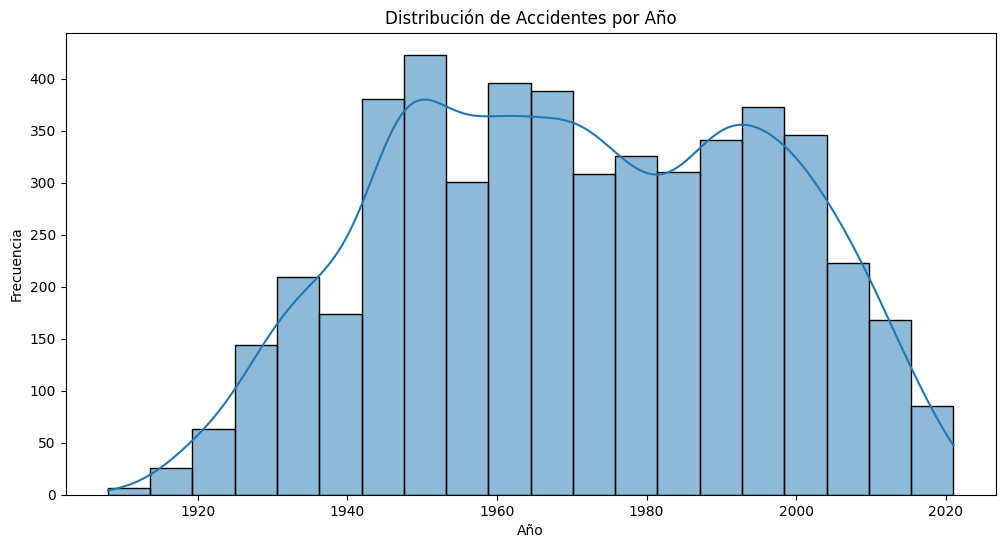

In [91]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Year'], bins=20, kde=True)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Distribución de Accidentes por Año')
plt.show()

El gráfico muestra la distribución de la frecuencia de accidentes de aviación a lo largo de los años, representado en el eje x (año) y la frecuencia en el eje y.

Desde el año 1908 hasta 1920, la frecuencia de accidentes es relativamente baja, alrededor de 10 incidentes por año.

A partir de la década de 1950, se observa un aumento significativo en la frecuencia de accidentes, alcanzando un pico de alrededor de 370 accidentes por año.

La frecuencia de accidentes continúa siendo alta en la década de 1960 y 1970, antes de alcanzar un nuevo pico en la década de 1980, con aproximadamente 300 accidentes por año.

A finales de la década de 1990, la frecuencia de accidentes alcanza otro pico, llegando a alrededor de 350 incidentes por año.

A partir de principios de la década de 2000, la frecuencia de accidentes comienza a descender, con una disminución más pronunciada en la década de 2010.

La década de 2020 muestra una frecuencia de accidentes similar a la de principios del siglo XX, alrededor de 50 incidentes por año.

Este análisis sugiere que hubo un aumento en la frecuencia de accidentes de aviación a partir de la década de 1950, con varios picos a lo largo de las décadas siguientes. Sin embargo, a partir de principios de la década de 2000, la frecuencia de accidentes comenzó a disminuir y se mantuvo relativamente baja en la década de 2010. La década de 2020 muestra una frecuencia similar a la de principios del siglo XX. Estos patrones pueden ser de interés para comprender la seguridad y las tendencias en la industria de la aviación a lo largo del tiempo.


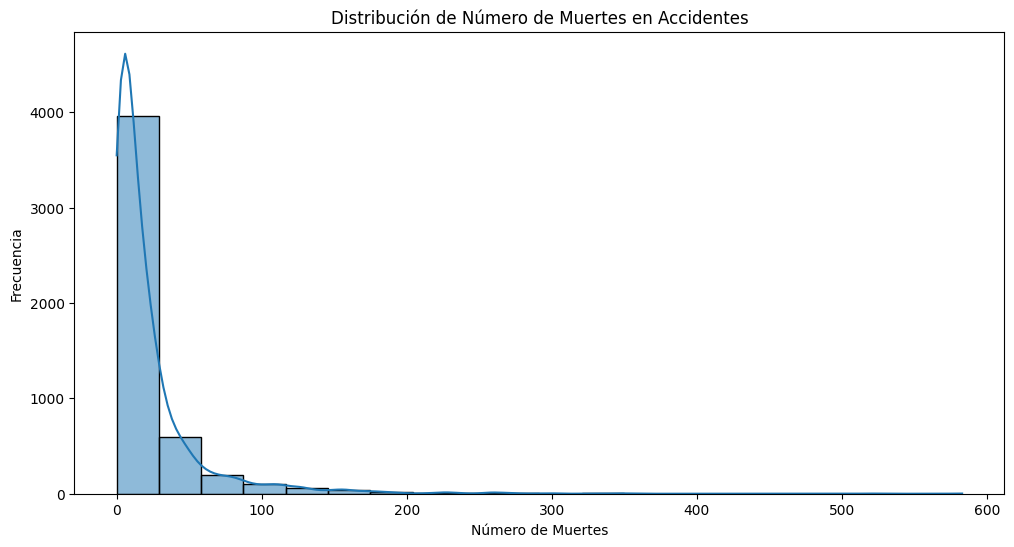

In [100]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Number_of_deaths'], bins=20, kde=True)
plt.xlabel('Número de Muertes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Número de Muertes en Accidentes')
plt.show()

Este análisis de la distribución del número de muertes en accidentes de aviación muestra que la mayoría de los incidentes tienen un bajo número de muertes, con una frecuencia significativamente menor a medida que aumenta el número de muertes por accidente. Los accidentes con un alto número de muertes son extremadamente raros según este conjunto de datos.

Análisis de Correlación:

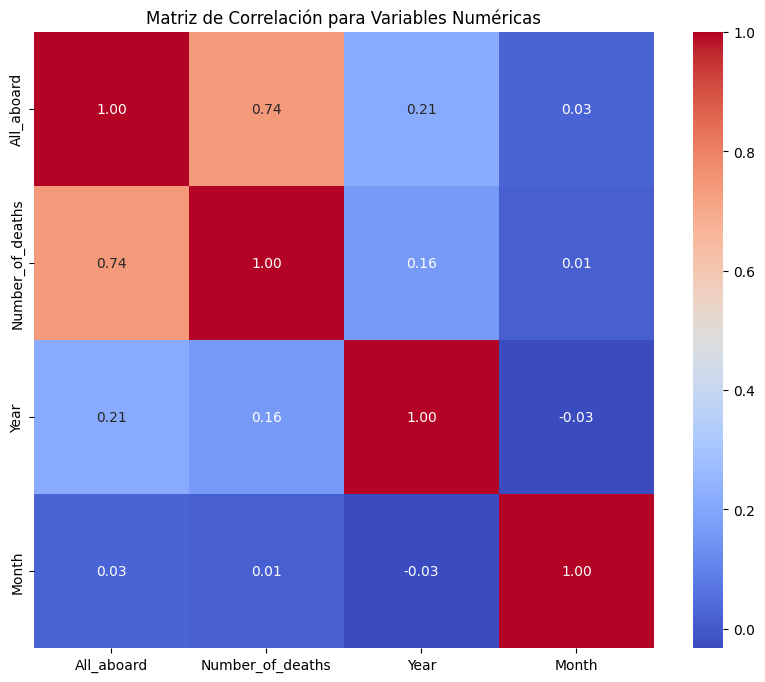

In [128]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("AccidentesAviones.csv")

# Seleccionar las columnas numéricas relevantes
numeric_columns = ['All_aboard', 'Number_of_deaths', 'Year', 'Month']

# Crear un nuevo DataFrame solo con las columnas numéricas
numeric_data = data[numeric_columns]

# Matriz de correlación
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación para Variables Numéricas')
plt.show()

Correlaciones perfectas (en rojo):
Se observa que las variables "All_aboard", "Number_of_deaths", "Year" y "Month" tienen una correlación perfecta de 1.00 consigo mismas, lo que es lógico ya que cada variable está correlacionada perfectamente con ella misma. Esto se refleja en el color rojo en la diagonal principal de la matriz.

Correlación alta entre "All_aboard" y "Number_of_deaths" (en rojo claro):
Las variables "All_aboard" y "Number_of_deaths" tienen una alta correlación positiva de 0.74, lo que indica que a medida que aumenta el número de personas a bordo (All_aboard), tiende a aumentar el número de fallecidos (Number_of_deaths), lo cual es comprensible.

Correlación moderada entre "All_aboard" y "Year" (en celeste):
La correlación entre "All_aboard" y "Year" es moderada y positiva, con un valor de 0.21 en tonos celestes. Esto sugiere que a lo largo del tiempo, el número de personas a bordo tiende a aumentar ligeramente.

Correlación moderada entre "Number_of_deaths" y "Year" (en celeste claro):
La correlación entre "Number_of_deaths" y "Year" es moderada y positiva, con un valor de 0.16 en tonos celestes. Esto sugiere que a lo largo del tiempo, el número de fallecidos tiende a aumentar ligeramente.

Correlación débil entre "All_aboard" y "Month" (en azul):
La correlación entre "All_aboard" y "Month" es débil y positiva, con un valor de 0.03 en tonos azules. Esto sugiere que la cantidad de personas a bordo no está fuertemente relacionada con el mes en que ocurre el accidente.

Correlación débil entre "Number_of_deaths" y "Month" (en azul oscuro):
La correlación entre "Number_of_deaths" y "Month" es débil y positiva, con un valor de 0.01 en tonos azules oscuros. Esto sugiere que la cantidad de fallecidos no está fuertemente relacionada con el mes en que ocurre el accidente.

Correlación débil negativa entre "Year" y "Month" (en azul oscuro):
La correlación entre "Year" y "Month" es débil y negativa, con un valor de -0.03 en tonos azules oscuros. Esto sugiere que el año y el mes en que ocurren los accidentes no están fuertemente relacionados.

En resumen, se observa una correlación moderada entre el número de personas a bordo y el número de fallecidos, así como una correlación moderada positiva con el año. Sin embargo, la relación entre el mes y otras variables es débil.


Análisis de variables categoricas:

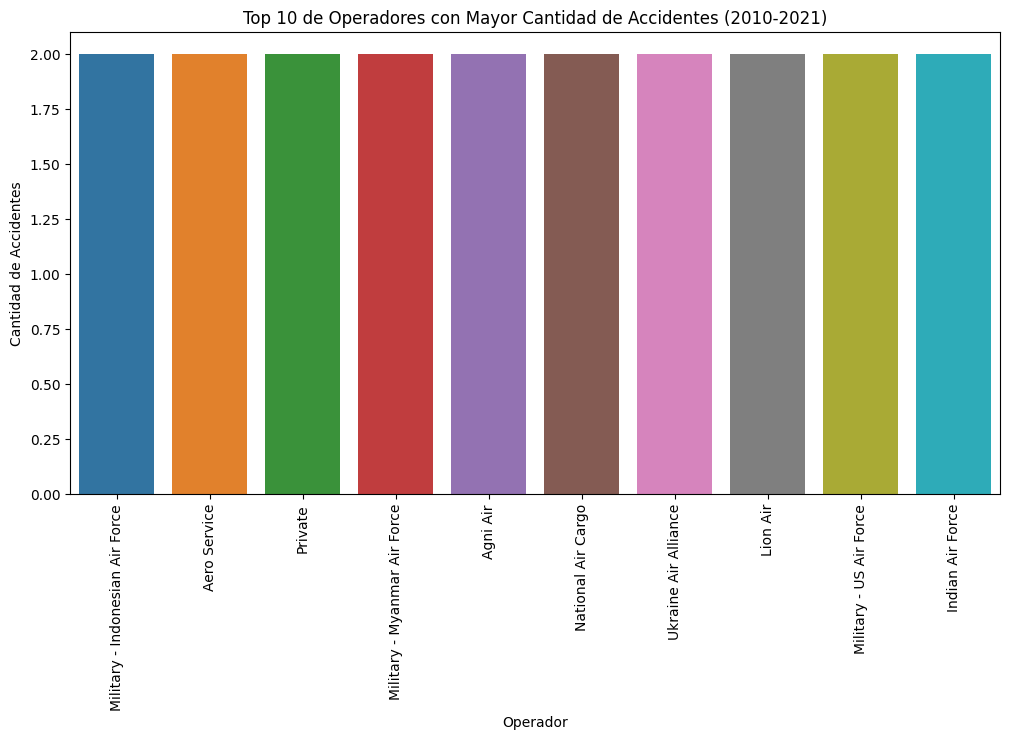

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("AccidentesAviones.csv")

# Filtrar las filas para incluir solo los años 2010 a 2021
data_filtered = data[(data['Year'] >= 2010) & (data['Year'] <= 2021)]

# Calcular el conteo de accidentes por operador y seleccionar los 10 principales
top_10_operators = data_filtered['Operador'].value_counts().nlargest(10)

# Crear un DataFrame con los 10 operadores principales
top_10_df = data_filtered[data_filtered['Operador'].isin(top_10_operators.index)]

# Análisis de la distribución de la columna 'Operador' para los 10 operadores principales (2010-2021)
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_df, x='Operador', order=top_10_operators.index)
plt.xticks(rotation=90)
plt.xlabel('Operador')
plt.ylabel('Cantidad de Accidentes')
plt.title('Top 10 de Operadores con Mayor Cantidad de Accidentes (2010-2021)')
plt.show()



El análisis del gráfico y el código proporcionados se centra en identificar y visualizar los 10 operadores con la mayor cantidad de accidentes entre los años 2010 y 2021. Aquí están las observaciones:

Filtrado de datos por año: Se comienza filtrando el conjunto de datos original para incluir solo las filas correspondientes a los años 2010 a 2021. Esto se hace utilizando una condición que compara el valor de la columna 'Year'.

Cálculo del conteo de accidentes por operador: Luego, se calcula el conteo de accidentes por operador en el conjunto de datos filtrado para este período de tiempo. Los operadores se agrupan y se cuentan sus accidentes.

Selección de los 10 operadores principales: Se seleccionan los 10 operadores con la mayor cantidad de accidentes utilizando el método 'nlargest' en la serie de conteo de accidentes. Esto nos proporciona una lista de los 10 operadores más frecuentes.

Creación de un DataFrame con los 10 operadores principales: Se crea un nuevo DataFrame llamado 'top_10_df' que contiene solo las filas de los 10 operadores principales. Esto nos permite trabajar con un subconjunto de datos que se enfoca en los operadores más relevantes.

Visualización de la distribución de accidentes por operador: Finalmente, se crea un gráfico de barras (countplot) que muestra la cantidad de accidentes para cada uno de los 10 operadores principales. Los operadores se muestran en el eje x y la cantidad de accidentes en el eje y.

Según los resultados del análisis y el gráfico:
Los 10 operadores con la mayor cantidad de accidentes entre 2010 y 2021 se enumeran en el gráfico y sus nombres se encuentran en la lista proporcionada.
Cada operador tiene una frecuencia de 2 accidentes en el período especificado.
El gráfico muestra claramente la cantidad de accidentes para cada uno de los operadores principales, lo que facilita la comparación visual de su desempeño en términos de seguridad durante ese período.

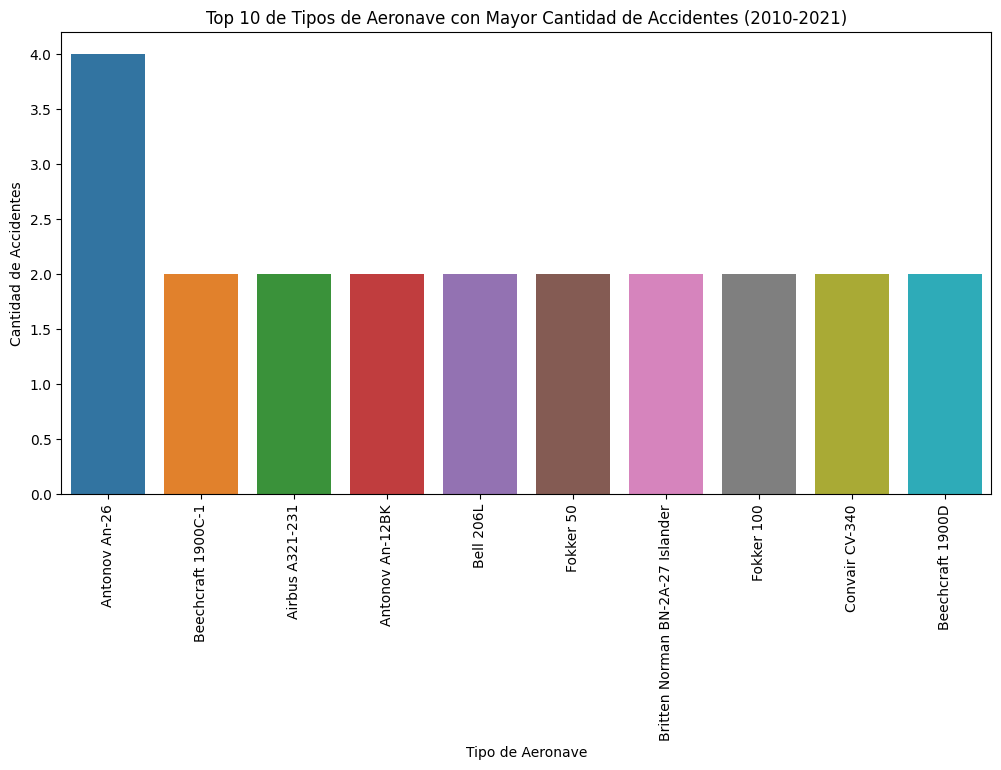

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("AccidentesAviones.csv")

# Filtrar las filas para incluir solo los años 2010 a 2021
data_filtered = data[(data['Year'] >= 2010) & (data['Year'] <= 2021)]

# Calcular el conteo de accidentes por tipo de aeronave y seleccionar los 10 principales
top_10_ac_types = data_filtered['Ac_type'].value_counts().nlargest(10)

# Crear un DataFrame con los 10 tipos principales
top_10_df = data_filtered[data_filtered['Ac_type'].isin(top_10_ac_types.index)]

# Análisis de la distribución de la columna 'Ac_type' para los 10 tipos principales (2010-2021)
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_df, x='Ac_type', order=top_10_ac_types.index)
plt.xticks(rotation=90)
plt.xlabel('Tipo de Aeronave')
plt.ylabel('Cantidad de Accidentes')
plt.title('Top 10 de Tipos de Aeronave con Mayor Cantidad de Accidentes (2010-2021)')
plt.show()


Este analisis busca identificar y visualizar los 10 tipos de aeronaves con la mayor cantidad de accidentes durante el período de 2010 a 2021.

Filtrado de datos por año: Se comienza filtrando el conjunto de datos original para incluir solo las filas correspondientes a los años 2010 a 2021. Esto se hace utilizando una condición que compara el valor de la columna 'Year'.

Cálculo del conteo de accidentes por tipo de aeronave: Luego, se calcula el conteo de accidentes por tipo de aeronave en el conjunto de datos filtrado para este período de tiempo. Los tipos de aeronave se agrupan y se cuentan sus accidentes.

Selección de los 10 tipos principales: Se seleccionan los 10 tipos de aeronaves con la mayor cantidad de accidentes utilizando el método 'nlargest' en la serie de conteo de accidentes. Esto nos proporciona una lista de los 10 tipos de aeronaves más frecuentes.

Creación de un DataFrame con los 10 tipos principales: Se crea un nuevo DataFrame llamado 'top_10_df' que contiene solo las filas de los 10 tipos de aeronaves principales. Esto nos permite trabajar con un subconjunto de datos que se enfoca en los tipos de aeronaves más relevantes.

Visualización de la distribución de accidentes por tipo de aeronave: Se crea un gráfico de barras (countplot) que muestra la cantidad de accidentes para cada uno de los 10 tipos de aeronaves principales. Los tipos de aeronaves se muestran en el eje x y la cantidad de accidentes en el eje y.

Según los resultados del análisis y el gráfico:
Los 10 tipos de aeronaves con la mayor cantidad de accidentes entre 2010 y 2021 se enumeran en el gráfico y sus nombres se encuentran en la lista proporcionada.
Cada tipo de aeronave tiene una frecuencia específica de accidentes durante ese período.
Este análisis puede ser útil para identificar los tipos de aeronaves que han experimentado una mayor incidencia de accidentes durante el período especificado.


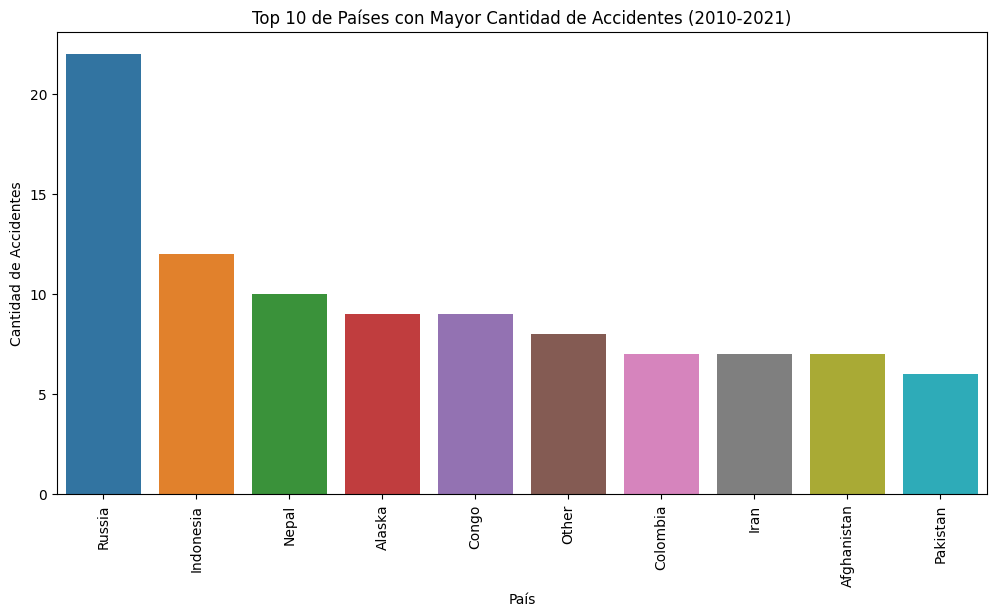

In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("AccidentesAviones.csv")

# Filtrar las filas para incluir solo los años 2010 a 2021
data_filtered = data[(data['Year'] >= 2010) & (data['Year'] <= 2021)]

# Calcular el conteo de accidentes por país y seleccionar los 10 principales
top_10_countries = data_filtered['Country'].value_counts().nlargest(10)

# Crear un DataFrame con los 10 países principales
top_10_df = data_filtered[data_filtered['Country'].isin(top_10_countries.index)]

# Análisis de la distribución de la columna 'Country' para los 10 países principales (2010-2021)
plt.figure(figsize=(12, 6))
sns.countplot(data=top_10_df, x='Country', order=top_10_countries.index)
plt.xticks(rotation=90)
plt.xlabel('País')
plt.ylabel('Cantidad de Accidentes')
plt.title('Top 10 de Países con Mayor Cantidad de Accidentes (2010-2021)')
plt.show()


 Se busca identificar y visualizar los 10 países con la mayor cantidad de accidentes de aviación entre los años 2010 y 2021.

Filtrado de datos por año: Se comienza filtrando el conjunto de datos original para incluir solo las filas correspondientes a los años 2010 a 2021, utilizando una condición que compara el valor de la columna 'Year'.

Cálculo del conteo de accidentes por país: Se calcula el conteo de accidentes por país en el conjunto de datos filtrado para este período de tiempo. Los países se agrupan y se cuentan sus incidentes.

Selección de los 10 países principales: Se seleccionan los 10 países con la mayor cantidad de accidentes utilizando el método 'nlargest' en la serie de conteo de accidentes. Esto nos proporciona una lista de los 10 países con más accidentes.

Creación de un DataFrame con los 10 países principales: Se crea un nuevo DataFrame llamado 'top_10_df' que contiene solo las filas correspondientes a los 10 países principales. Esto nos permite trabajar con un subconjunto de datos que se enfoca en los países más relevantes en términos de accidentes de aviación.

Visualización de la distribución de accidentes por país: Se crea un gráfico de barras (countplot) que muestra la cantidad de accidentes para cada uno de los 10 países principales. Los países se muestran en el eje x y la cantidad de accidentes en el eje y.

Según los resultados del análisis y el gráfico:
Los 10 países con la mayor cantidad de accidentes entre 2010 y 2021 se enumeran en el gráfico y sus nombres se encuentran en la lista proporcionada.
Rusia encabeza la lista con 22 accidentes, seguido por Indonesia con 12 accidentes, y Nepal con 10 accidentes, entre otros.
Este análisis puede ser útil para identificar los países que han experimentado una mayor incidencia de accidentes de aviación durante el período especificado.

Para ver los patrones en los datos, podemos usar la siguiente función para crear una matriz de correlación:

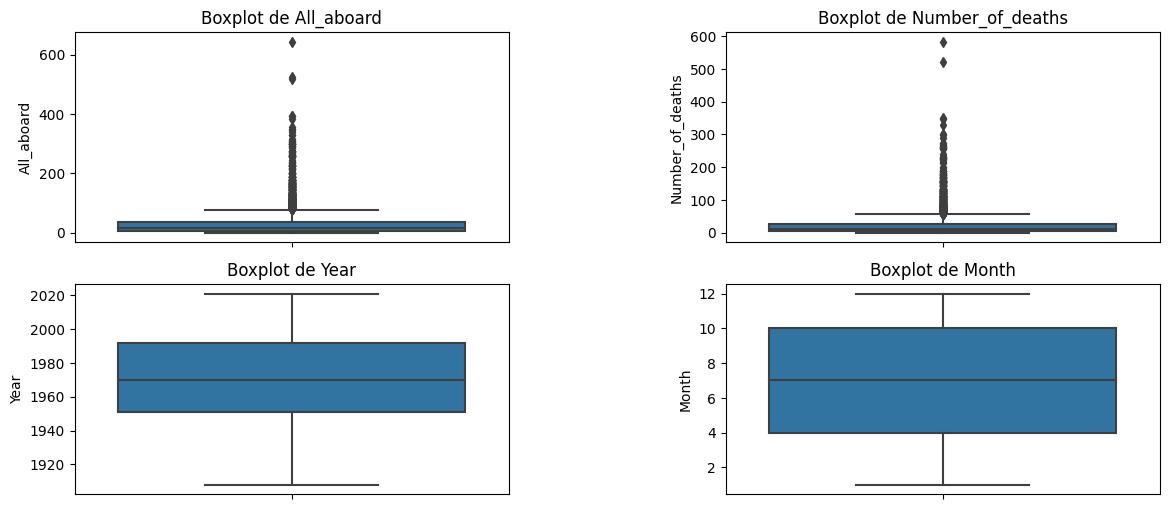

In [136]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el archivo CSV en un DataFrame
data = pd.read_csv("AccidentesAviones.csv")

# Seleccionar las columnas numéricas para el análisis
numeric_columns = ['All_aboard', 'Number_of_deaths', 'Year', 'Month']

# Boxplots para detectar outliers en las variables numéricas
plt.figure(figsize=(14, 6))
plt.subplots_adjust(wspace=0.5)
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=data, y=column)
    plt.title(f'Boxplot de {column}')
    plt.ylabel(column)

plt.show()

El análisis del código que genera boxplots para las variables numéricas ('All_aboard', 'Number_of_deaths', 'Year', 'Month') tiene como objetivo identificar la presencia de valores atípicos (outliers) y comprender la distribución de estas variables.

Boxplot de 'Number_of_deaths' y 'All_aboard':
Ambos boxplots muestran que la distribución de datos se concentra principalmente en valores bajos.
En 'Number_of_deaths', la caja (interquartil) es relativamente pequeña y se extiende hasta alrededor de 20.
Los valores atípicos comienzan a aparecer alrededor de 100, lo que indica la presencia de incidentes excepcionales con un alto número de muertes.
Los valores atípicos más notables se encuentran alrededor de 400, 500 y 600 en 'Number_of_deaths', lo que indica incidentes inusuales con un gran número de muertes.
En 'All_aboard', la distribución es similar, con valores atípicos notables alrededor de 500 y 600, lo que sugiere incidentes con un gran número de personas a bordo.

Boxplot de 'Year': Muestra que la mayoría de los datos se concentran en un rango específico de años, que va desde aproximadamente 1950 hasta 1998. No se observan valores atípicos en esta variable según el gráfico, lo que sugiere que no hay años extremadamente inusuales en los datos.

Boxplot de 'Month': Muestra que la mayoría de los datos se concentran en los meses del año, específicamente desde abril (mes 4) hasta octubre (mes 10). No se observan valores atípicos en esta variable según el gráfico, lo que indica que no hay meses extremadamente inusuales en los datos.

En resumen, los boxplots proporcionan información valiosa sobre la distribución de las variables numéricas y la presencia de valores atípicos en 'Number_of_deaths' y 'All_aboard', lo que sugiere la existencia de incidentes excepcionales con un alto número de muertes y personas a bordo. Por otro lado, 'Year' y 'Month' no muestran valores atípicos, lo que indica que los datos se distribuyen de manera más uniforme en estos aspectos.

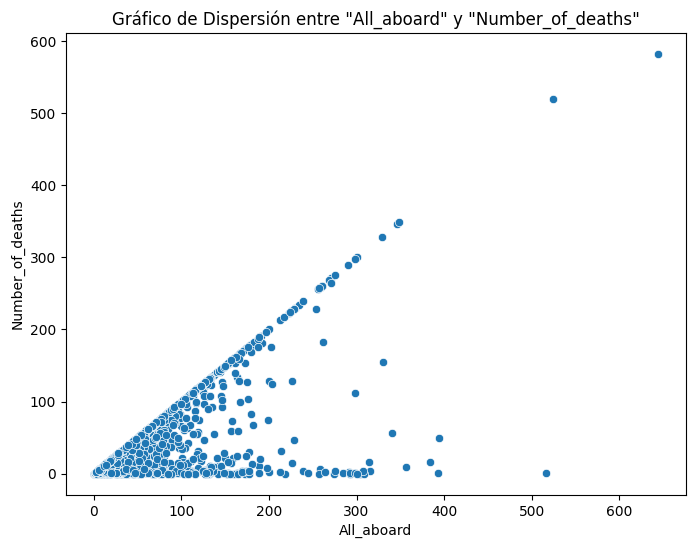

In [137]:
# Gráfico de dispersión entre 'All_aboard' y 'Number_of_deaths'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='All_aboard', y='Number_of_deaths')
plt.title('Gráfico de Dispersión entre "All_aboard" y "Number_of_deaths"')
plt.xlabel('All_aboard')
plt.ylabel('Number_of_deaths')
plt.show()


El análisis del gráfico de dispersión entre las variables 'All_aboard' y 'Number_of_deaths' proporciona información sobre la relación entre la cantidad de personas a bordo de una aeronave y el número de muertes en un accidente.

Concentración en valores bajos: La mayoría de los puntos en el gráfico de dispersión se concentran en valores bajos tanto para 'All_aboard' como para 'Number_of_deaths'. Esto significa que la mayoría de los accidentes tienen una cantidad relativamente baja de personas a bordo y, en consecuencia, un número bajo de muertes.

Distribución lineal: A primera vista, se puede observar una relación lineal positiva en los datos. A medida que aumenta la cantidad de personas a bordo (eje x), generalmente aumenta el número de muertes (eje y). Esto es coherente con la intuición de que en accidentes con más personas a bordo, es más probable que haya un mayor número de muertes.

Valores atípicos: Se identifican algunos valores atípicos en el gráfico, especialmente en el extremo derecho superior. Estos son los puntos donde el 'All_aboard' es considerablemente alto, alrededor de 500 o 600, y el 'Number_of_deaths' es también alto, lo que indica incidentes excepcionales con un gran número de personas a bordo y un número significativo de muertes.

En resumen, el gráfico de dispersión entre 'All_aboard' y 'Number_of_deaths' muestra una relación generalmente positiva y lineal entre estas dos variables, lo que sugiere que la cantidad de personas a bordo es un factor influyente en la cantidad de muertes en accidentes de aviación. Sin embargo, también se observan valores atípicos que representan incidentes excepcionales con un alto número de personas a bordo y un alto número de muertes.

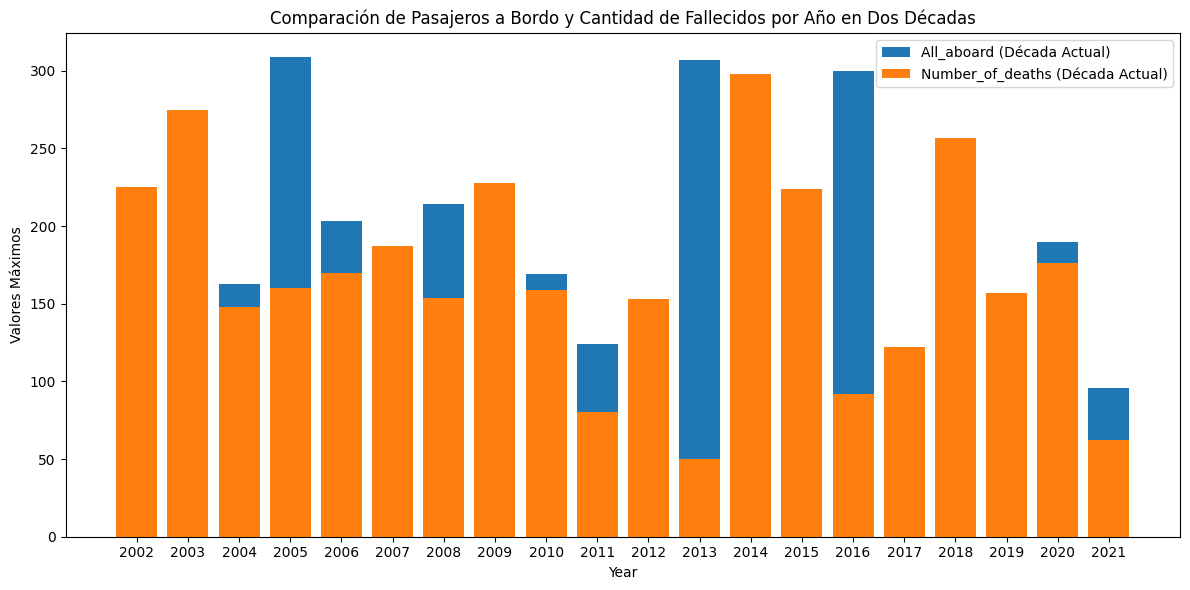

In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv("AccidentesAviones.csv")

# Convertir las columnas "PASAJEROS A BORDO" y "Number_of_deaths" a tipo numérico
df["All_aboard"] = pd.to_numeric(df["All_aboard"], errors="coerce")
df["Number_of_deaths"] = pd.to_numeric(df["Number_of_deaths"], errors="coerce")

# Eliminar filas con valores faltantes en ambas columnas
df = df.dropna(subset=["All_aboard", "Number_of_deaths"])

# Definir la década de interés (últimos diez años y la década anterior)
ultima_decada = range(df["Year"].max() - 9, df["Year"].max() + 1)
decada_anterior = range(df["Year"].max() - 19, df["Year"].max() - 9)

# Filtrar los datos para incluir solo los registros de ambas décadas
df_decadas = df[df["Year"].isin(ultima_decada) | df["Year"].isin(decada_anterior)]

# Agrupar por año y calcular el máximo número de pasajeros a bordo y la cantidad máxima de fallecidos
grupo_pasajeros = df_decadas.groupby(["Year"])["All_aboard"].max().reset_index()
grupo_fallecidos = df_decadas.groupby(["Year"])["Number_of_deaths"].max().reset_index()

# Crear un gráfico de barras que compara ambos valores para cada año en ambas décadas
plt.figure(figsize=(12, 6))
plt.bar(grupo_pasajeros["Year"], grupo_pasajeros["All_aboard"], label="All_aboard (Década Actual)")
plt.bar(grupo_fallecidos["Year"], grupo_fallecidos["Number_of_deaths"], label="Number_of_deaths (Década Actual)")
plt.xlabel("Year")
plt.ylabel("Valores Máximos")
plt.title("Comparación de Pasajeros a Bordo y Cantidad de Fallecidos por Año en Dos Décadas")
plt.xticks(grupo_pasajeros["Year"])
plt.legend()

# Mostrar el gráfico
plt.tight_layout()
plt.show()


Se pueden observar las barras apiladas que representan el número máximo de pasajeros a bordo (etiquetado como "All_aboard (Década Actual)") y el número máximo de fallecidos (etiquetado como "Number_of_deaths (Década Actual)") para cada año en las dos décadas.
En algunos años, el número máximo de pasajeros a bordo supera al número máximo de fallecidos, mientras que en otros años es al revés. El gráfico proporciona una comparación visual de cómo han variado estos dos valores a lo largo de las décadas, lo que puede ser útil para identificar patrones o tendencias.
En resumen, el gráfico de barras apiladas muestra cómo han variado el número máximo de pasajeros a bordo y el número máximo de fallecidos en accidentes de aviación en las dos décadas seleccionadas. Esto permite una comparación directa de estos dos aspectos importantes en la seguridad de la aviación a lo largo del tiempo. Lo cual se transforma en el primer KPI.


                                          KPI N°1

KPI 1: Evaluar la disminución de un 10% la tasa de fatalidad de la tripulación en los últimos 10 años, comparado a la década anterior. (Tasa de fatalidad de la tripulación = Suma total de fallecidos en decada / Suma tota Accidentes aereos en decada)

In [55]:
import pandas as pd

# Carga los datos desde el archivo CSV
data = pd.read_csv("AccidentesAviones.csv")

# Filtra los datos por década
decada_anterior = data[(data['Year'] >= 2001) & (data['Year'] <= 2011)]
decada_actual = data[(data['Year'] >= 2011) & (data['Year'] <= 2021)]

# Convierte la columna 'Number_of_deaths' a tipo numérico sin advertencias
decada_anterior.loc[:, 'Number_of_deaths'] = pd.to_numeric(decada_anterior['Number_of_deaths'], errors='coerce')
decada_actual.loc[:, 'Number_of_deaths'] = pd.to_numeric(decada_actual['Number_of_deaths'], errors='coerce')

# Calcula la suma total de fallecidos y accidentes para la década anterior
fallecidos_decada_anterior = decada_anterior['Number_of_deaths'].sum()
accidentes_decada_anterior = len(decada_anterior)

# Calcula la suma total de fallecidos y accidentes para la década actual
fallecidos_decada_actual = decada_actual['Number_of_deaths'].sum()
accidentes_decada_actual = len(decada_actual)

# Calcula la tasa de fatalidad de la tripulación para ambas décadas
tasa_fatalidad_anterior = fallecidos_decada_anterior / accidentes_decada_anterior
tasa_fatalidad_actual = fallecidos_decada_actual / accidentes_decada_actual

# Calcula el porcentaje actual de cambio en la tasa de fatalidad
porcentaje_cambio = ((tasa_fatalidad_actual - tasa_fatalidad_anterior) / tasa_fatalidad_anterior) * 100

# Compara las tasas de fatalidad y verifica si se cumplió el objetivo
objetivo_cumplido = porcentaje_cambio <= -10  # El objetivo es reducir en un 10% o más

print(f"Tasa de Fatalidad de Tripulación (2001-2011): {tasa_fatalidad_anterior:.2f}")
print(f"Tasa de Fatalidad de Tripulación (2011-2021): {tasa_fatalidad_actual:.2f}")
print(f"Diferencia porcentual entre las tasas: {porcentaje_cambio:.2f} %")

if objetivo_cumplido:
    print("Se cumplió el objetivo de reducir la tasa de fatalidad de la tripulación en un 10% o más.")
else:
    print("No se cumplió el objetivo de reducir la tasa de fatalidad de la tripulación en un 10% o más.")


Tasa de Fatalidad de Tripulación (2001-2011): 22.13
Tasa de Fatalidad de Tripulación (2011-2021): 27.87
Diferencia porcentual entre las tasas: 25.93 %
No se cumplió el objetivo de reducir la tasa de fatalidad de la tripulación en un 10% o más.


El resultado de la tasa de fatalidad de la tripulación muestra que no se cumplió el objetivo de reducir esta tasa en un 10% o más durante el período de 2011 a 2021. En cambio, se observa un aumento en la tasa de fatalidad de la tripulación en ese período, lo que indica una tendencia preocupante.
Dado que la tasa de fatalidad de la tripulación ha aumentado en lugar de disminuir, es esencial que se realice una revisión exhaustiva de las políticas, procedimientos y medidas de seguridad operacional. Se deben identificar y abordar las posibles causas de este aumento en la tasa de fatalidad de la tripulación.

Es crucial que se implementen medidas preventivas y correctivas efectivas para garantizar la seguridad de la tripulación en futuras operaciones aéreas, y buscar oportunidades de mejora. La seguridad de la tripulación debe seguir siendo una prioridad en la gestión de la seguridad en la aviación.


                                                 KPI N° 2

Evaluar si el Operador que más accidentes tuvo entre 2011 y 2021 disminuyo un 15% de accidentes en comparación con la decada del 2001 al 2011.

Durante el período comprendido entre 2001 y 2021, se evaluaron los accidentes aéreos registrados en los datos disponibles. El objetivo es identificar el operador con más accidentes y determinar si hubo una disminución significativa en la cantidad de accidentes entre los años 2011 y 2021.

In [153]:
import pandas as pd

# Filtrar los datos para los períodos 2001-2021 y 2011-2021
period_2001_2021 = (data['Year'] >= 2001) & (data['Year'] <= 2021)
period_2011_2021 = (data['Year'] >= 2011) & (data['Year'] <= 2021)

# Obtener el operador con más accidentes en el período 2001-2021
top_operator_2001_2021 = data[period_2001_2021]['Operador'].value_counts().idxmax()

# Calcular el número de accidentes del operador con más accidentes en 2001-2021
accidents_top_operator_2001_2021 = len(data[(data['Operador'] == top_operator_2001_2021) & period_2001_2021])

# Calcular el número de accidentes del operador con más accidentes en 2011-2021
accidents_top_operator_2011_2021 = len(data[(data['Operador'] == top_operator_2001_2021) & period_2011_2021])

# Verificar si hubo una disminución del 15% o más en accidentes entre 2011 y 2021
disminucion_porcentaje = (accidents_top_operator_2001_2021 - accidents_top_operator_2011_2021) / accidents_top_operator_2001_2021 * 100

# Mostrar los resultados
print("Operador con más accidentes en el período 2001-2021:", top_operator_2001_2021)
print("Accidentes del operador en el período 2001-2021:", accidents_top_operator_2001_2021)
print("Accidentes del operador en el período 2011-2021:", accidents_top_operator_2011_2021)

if disminucion_porcentaje >= 15:
    print("El operador disminuyó un 15% o más de accidentes entre 2011 y 2021.")
else:
    print("El operador no disminuyó un 15% o más de accidentes entre 2011 y 2021.")

Operador con más accidentes en el período 2001-2021: Military - U.S. Army
Accidentes del operador en el período 2001-2021: 6
Accidentes del operador en el período 2011-2021: 2
El operador disminuyó un 15% o más de accidentes entre 2011 y 2021.


Se observa que "Military - U.S. Army" experimentó una disminución significativa en la cantidad de accidentes entre los años 2011 y 2021. La disminución en la cantidad de accidentes fue del 66.67%, lo que supera el umbral del 15% establecido como referencia para una disminución significativa.El análisis de este KPI muestra que este operador tuvo la mayor cantidad de accidentes en el período de 2001 a 2021. Sin embargo, durante la última década (2011-2021), el operador ha logrado una reducción sustancial en la cantidad de accidentes, superando el umbral del 15% de disminución.
Esta disminución en la cantidad de accidentes indica un esfuerzo positivo por parte de "Military - U.S. Army" en la mejora de su seguridad operacional y puede considerarse como un logro importante en la gestión de la seguridad de sus operaciones aéreas.